name Washington Post 1 146
name Washington Post 0 105
name The New York Times 1 111
name The New York Times 0 102
name The Hill 1 319
name The Hill 0 219


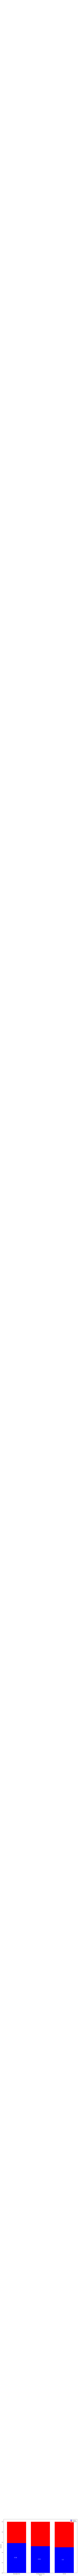

        Washington Post  The New York Times  The Hill
Likes            506947              730617    553666
Shares           236875              258434    232247
Love              37771               62866     77610
Wow               30600               40648     47276
Haha              56297               69356     91005
Sad               46015               57274     24157
Angry            246251              301210    232512


C:\Users\tiant\Anaconda3\lib\site-packages\matplotlib\__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


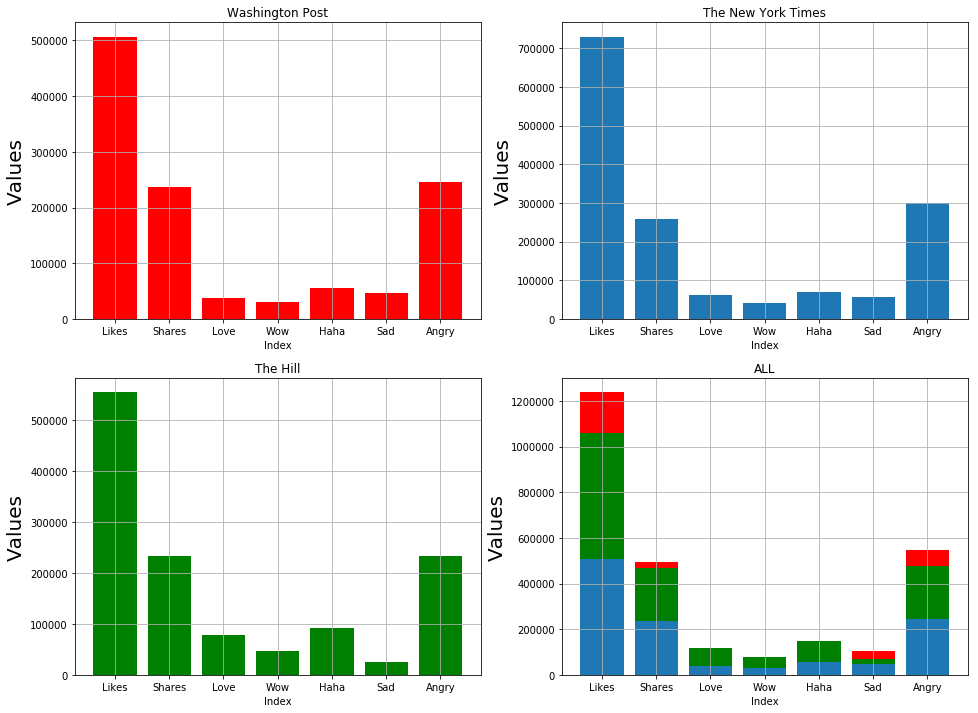

In [44]:
#coding=utf-8
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
data1=pd.read_csv("./9.csv",header=0,sep=",")

#Analysis
view =np.array(data1["Message"])
sid = SentimentIntensityAnalyzer()
attitude=[]
for sen in view:
    ss = sid.polarity_scores(sen)
    if ss["pos"]>=ss["neg"]:
        attitude.append(int(1))
    else:
        attitude.append(int(0))
data1["attitude"]=attitude
data1.to_csv("./9.csv",index=False)

#Graphic1
name=['Washington Post', 'The New York Times', 'The Hill']
for i in name:
    df=data1.loc[data1['Name']==i]
    len=0
    len1=0
    for j in df["attitude"]:
        if j==1:
            len+=1
        else:
            len1+=1
    print("name",i,"1",len)
    print("name",i,"0",len1)

x=np.array([146,111,219])
x1=np.array([105,102,219])
zong = x+x1
plt.bar([1,2,3], height=x/zong, color='blue', label=u'Positive')
plt.bar([1,2,3], height=x1/zong, color='red', bottom=x/zong, label=u'Negative')
y_lin=x/zong
for i in range(1,4):
    plt.text(i-0.1,y_lin[i-1]/2,str(round(y_lin[i-1],2)),color="white",size=15)
    plt.text(i-0.1,(100-y_lin[i-1])/2+y_lin[i-1],str(round(1-y_lin[i-1],2)),color="white",size=15)
plt.xticks([1,2,3], name)
plt.xlabel('Source')
plt.ylabel('Sentiment')
plt.legend(loc='best')
plt.show()

#Graphic2
name=['Washington Post', 'The New York Times', 'The Hill']
name1=["Likes","Shares","Love","Wow","Haha","Sad","Angry"]
df=pd.DataFrame(data=0, index=name1, columns=name,dtype=int)
for i in name1:
    for num,lin in enumerate(data1[i]):
        for j in name:
            if str(data1["Name"][num])==str(j):
                df[j][i]+=int(lin)
                break
            else:
                continue

print(df)
plt.rcParams['figure.figsize'] = (16.0, 12.0)
plt.subplot(221)
plt.bar(left=name1, height=df["Washington Post"],color="red",label=u'Washington Post')
plt.grid(True)
plt.axis('tight')
plt.xlabel("Index")
plt.ylabel('Values',size=20)
plt.title("Washington Post")

plt.subplot(222)
plt.bar(left=name1, height=df["The New York Times"],label=u'The New York Times')
plt.grid(True)
plt.axis('tight')
plt.xlabel("Index")
plt.ylabel('Values',size=20)
plt.title("The New York Times")

plt.subplot(223)
plt.bar(left=name1, height=df["The Hill"],color="green",label=u'The Hill')
plt.grid(True)
plt.axis('tight')
plt.xlabel("Index")
plt.ylabel('Values',size=20)
plt.title("The Hill")

plt.subplot(224)
plt.bar(left=name1, height=df["The New York Times"],label=u'The New York Times')
plt.bar(left=name1, height=df["Washington Post"], color='red', bottom=df["The New York Times"], label=u'Washington Post')
plt.bar(left=name1, height=df["The Hill"], color='green', bottom=df["Washington Post"], label=u'The Hill')
plt.grid(True)
plt.axis('tight')
plt.xlabel("Index")
plt.ylabel('Values',size=20)
plt.title("ALL")
plt.show()

